In [1]:
from matplotlib import pyplot as plt
import pandas as pd
from IPython.display import display
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Load data

In [2]:
# Load the data 
# Rabie El Kharoua. (2024). 📚 Students Performance Dataset 📚 [Data set]. Kaggle. https://doi.org/10.34740/KAGGLE/DS/5195702
df = pd.read_csv('Student_performance_data.csv')

# Display the DataFrame
display(df.head())

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


# Exploratory data analysis

In [3]:
# Some descriptive statistics
descriptive_stats = df.describe()
display(round(descriptive_stats,2))

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.00,2392.00,2392.00,2392.00,2392.00,2392.00,2392.00,2392.00,2392.00,2392.00,2392.00,2392.0,2392.00,2392.00,2392.00
mean,2196.50,16.47,0.51,0.88,1.75,9.77,14.54,0.30,2.12,0.38,0.30,0.2,0.16,1.91,2.98
std,690.66,1.12,0.50,1.03,1.00,5.65,8.47,0.46,1.12,0.49,0.46,0.4,0.36,0.92,1.23
min,1001.00,15.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00
25%,1598.75,15.00,0.00,0.00,1.00,5.04,7.00,0.00,1.00,0.00,0.00,0.0,0.00,1.17,2.00
50%,2196.50,16.00,1.00,0.00,2.00,9.71,15.00,0.00,2.00,0.00,0.00,0.0,0.00,1.89,4.00
75%,2794.25,17.00,1.00,2.00,2.00,14.41,22.00,1.00,3.00,1.00,1.00,0.0,0.00,2.62,4.00
max,3392.00,18.00,1.00,3.00,4.00,19.98,29.00,1.00,4.00,1.00,1.00,1.0,1.00,4.00,4.00


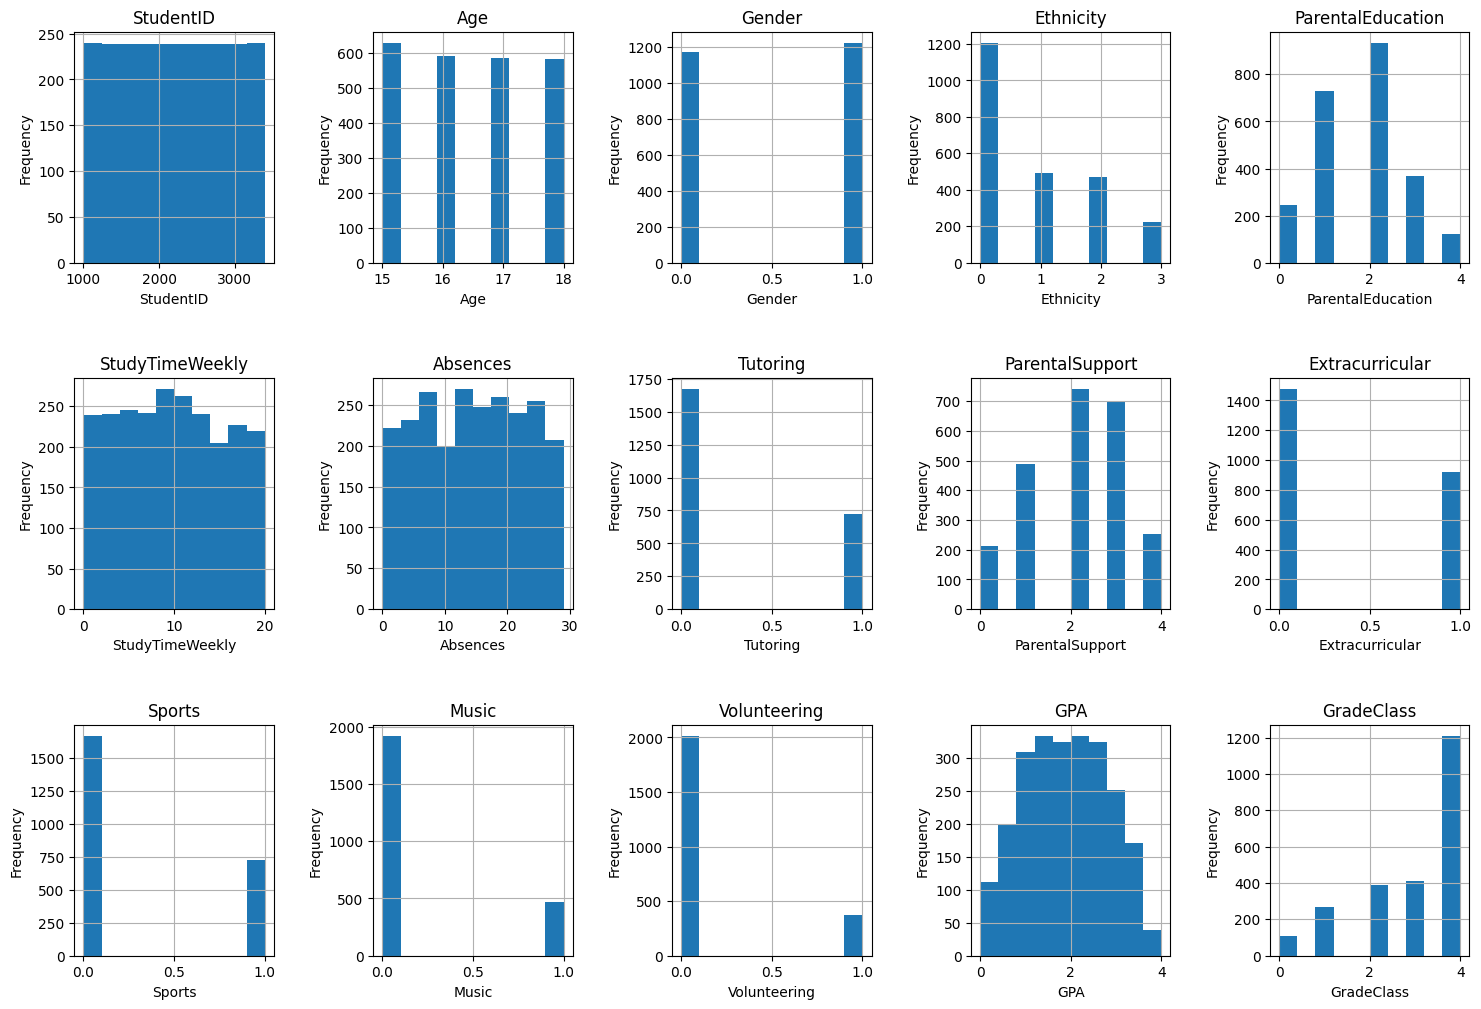

In [4]:
# Create a 3x5 grid for 15 variables
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(18, 12)) 
axes = axes.flatten()  # Flatten the 2D array of axes to 1D for easy iteration

# Loop through each variable and create a histogram
for i, col in enumerate(df.columns[:15]): 
    df[col].hist(ax=axes[i], bins=10)  # Create histogram in respective subplot
    axes[i].set_title(f'{col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Manually adjust spacing between subplots
plt.subplots_adjust(hspace=0.5, wspace=0.5)

# Display the plot
plt.show()

In [5]:
# See if there are any missing values
print(df.isnull().values.any()) # no missing values

# Info of the dataframe
df.info()

False
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


## Correlation of the features

In [6]:
# The correlation matrix for the features
matrix_corr = df.iloc[:, :14].corr()
# print("Correlation matrix is : ")
# print(matrix_corr)

styled_corr = matrix_corr.style.background_gradient(cmap='coolwarm').format(precision=2)
display(styled_corr)

## No strong correlation detected between the features

## There is zero or almost zero correlation between Age, Gender, and Volunteering with GPA, 
# so these three variables are not included in our model.

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA
StudentID,1.00,-0.04,-0.01,-0.01,-0.00,0.03,0.01,-0.01,0.00,-0.00,-0.02,-0.01,0.01,-0.00
Age,-0.04,1.00,0.04,-0.03,0.03,-0.01,-0.01,-0.01,0.03,-0.03,-0.05,-0.00,0.01,0.00
Gender,-0.01,0.04,1.00,0.02,0.01,0.01,0.02,-0.03,0.01,-0.01,-0.01,0.01,-0.00,-0.01
Ethnicity,-0.01,-0.03,0.02,1.00,0.03,0.01,-0.03,-0.02,0.02,-0.01,-0.00,-0.01,0.01,0.03
ParentalEducation,-0.00,0.03,0.01,0.03,1.00,-0.01,0.04,-0.02,-0.02,0.01,0.00,0.04,0.01,-0.04
StudyTimeWeekly,0.03,-0.01,0.01,0.01,-0.01,1.00,0.01,0.03,0.04,-0.02,0.01,0.01,-0.02,0.18
Absences,0.01,-0.01,0.02,-0.03,0.04,0.01,1.00,-0.02,0.00,0.00,0.04,-0.01,-0.02,-0.92
Tutoring,-0.01,-0.01,-0.03,-0.02,-0.02,0.03,-0.02,1.00,-0.00,0.00,0.01,-0.01,-0.05,0.15
ParentalSupport,0.00,0.03,0.01,0.02,-0.02,0.04,0.00,-0.00,1.00,-0.01,-0.01,0.04,-0.01,0.19
Extracurricular,-0.00,-0.03,-0.01,-0.01,0.01,-0.02,0.00,0.00,-0.01,1.00,-0.01,-0.01,-0.01,0.09


# Separate data to features and target

In [7]:
# target
y_classification = df['GradeClass']
y_regression = df['GPA']

# features (Remove Age, Gender and Volunteering as there is no correlation between them and the GPA)
X = df.drop(['GradeClass', 'GPA', 'StudentID', 'Age', 'Gender', 'Volunteering'], axis=1)

# Modify data for the model

In [8]:
X_mod = X.copy()
display(X_mod)

,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music
0,0,2,19.833723,7,1,2,0,0,1
1,0,1,15.408756,0,0,1,0,0,0
2,2,3,4.210570,26,0,2,0,0,0
3,0,3,10.028829,14,0,3,1,0,0
4,0,2,4.672495,17,1,3,0,0,0
...,...,...,...,...,...,...,...,...,...
2387,0,3,10.680555,2,0,4,1,0,0
2388,0,1,7.583217,4,1,4,0,1,0
2389,0,2,6.805500,20,0,2,0,0,0
2390,1,0,12.416653,17,0,2,0,1,1


In [9]:
# min max scaling for the StudyTimeWeekly, Absences, ParentalEducation and ParentalSupport
scaler = MinMaxScaler()
X_mod[['StudyTimeWeekly', 'Absences', 'ParentalEducation', 'ParentalSupport']] = \
scaler.fit_transform(X_mod.loc[:,['StudyTimeWeekly', 'Absences', 'ParentalEducation', 'ParentalSupport']])

In [ ]:
# No need to modify: Tutoring, Extracurricular, Sports and Music (as they have binary values)

In [10]:
# one-hot-encoding for Ethnicity

one_hot_encoded_data = pd.get_dummies(X_mod, columns = ['Ethnicity'], dtype=int)
X_mod = one_hot_encoded_data

# Save modified data

In [11]:
# Save DataFrame to a pickle file
X_mod.to_pickle('features.pkl')

In [12]:
y_classification.to_pickle('target_classification.pkl')
y_regression.to_pickle('target_regression.pkl')